In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [15]:
hdfc = yf.Ticker("HDFCBANK.NS")
df = hdfc.history(start="2016-01-01", end="2021-01-01")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-01,523.159971,526.954126,520.139138,526.229126,1597538,0.0,0.0
2016-01-04,523.933387,523.933387,516.248374,517.408386,2593768,0.0,0.0
2016-01-05,517.263250,519.486631,512.985763,513.493286,1580436,0.0,0.0
2016-01-06,510.714205,520.429193,510.714205,515.765015,2082768,0.0,0.0
2016-01-07,512.381655,514.701678,507.354976,510.496643,3027714,0.0,0.0


##### Monte Carlo Simulation

In [19]:
number_simulation = 10
predict_day = 30

close = df['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|██████████| 10/10 [00:00<00:00, 108.11it/s]


C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

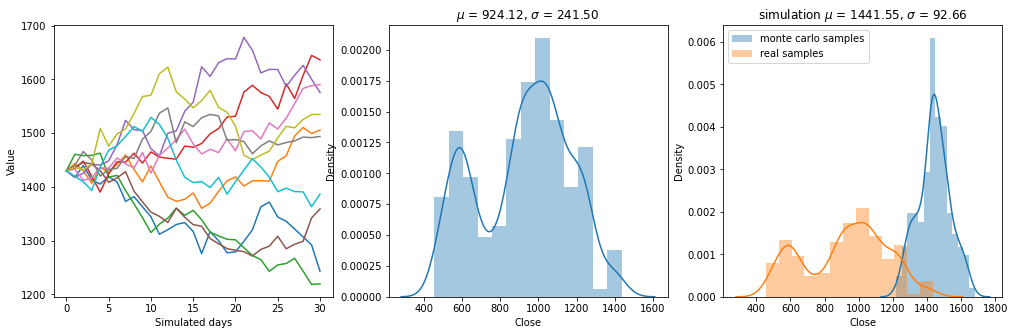

In [21]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

##### Dynamic Volatility Monte Carlo

In [26]:
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])

number_simulation = 10
predict_day = 30

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = df.Close.values[-predict_day:].tolist()
    volatility = pct_change(prices[-predict_day:]).std()
    for d in range(predict_day):
        prices.append(prices[-1] * (1 + np.random.normal(0, volatility)))
        volatility = pct_change(prices[-predict_day:]).std()
    results[i] = pd.Series(prices[-predict_day:]).values

100%|██████████| 10/10 [00:00<00:00, 317.69it/s]


C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

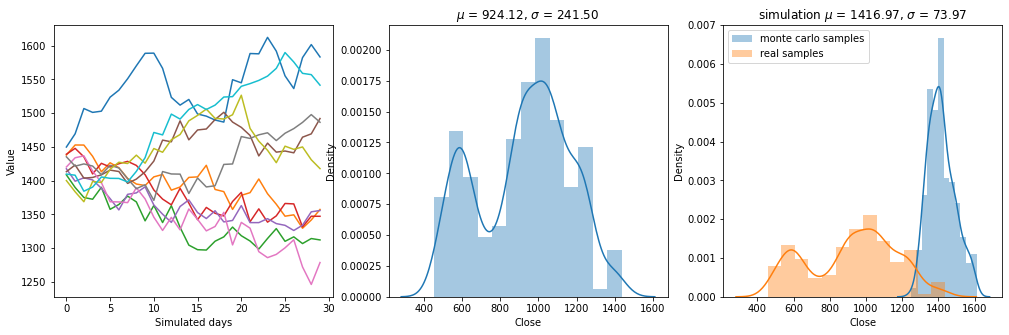

In [28]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

##### Drift Monte Carlo

In [30]:
number_simulation = 10
predict_day = 30

close = df['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|██████████| 10/10 [00:00<00:00, 96.14it/s]


C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rudraksh Kansal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

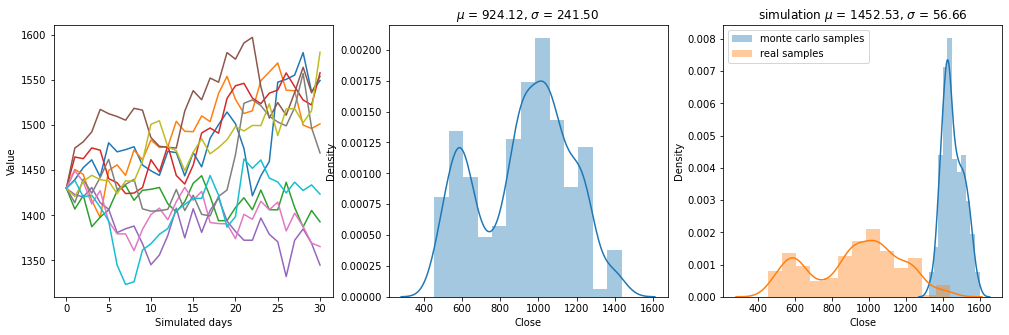

In [32]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()